In [1]:
from Solvers import adv_solver, span_solver, span_solver2
from Adversary import Adversary, Problem, to_str, visualize
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Examples import exact_k, threshold_k
from ElementDistinctness import ED
from copy import deepcopy as copy
import scipy
import cvxpy as cp
import itertools
import matplotlib as mpl
mpl.rcParams['figure.dpi'] =200
import networkx as nx

In [2]:
def matrix_triangle(n, k):
    num_nodes = 3 * n
    left = list(range(2*n))
    right = list(range(2*n, 3*n))
    paired_assignments = []
    no_mats = []
    for node_assignment in itertools.combinations(right, k):
        node_nodes = set(node_assignment)
        pair_nodes_range = set(right) - node_nodes
        for pair_assignment in itertools.combinations(pair_nodes_range, k):
            paired_assignments.append((tuple(node_assignment), tuple(pair_assignment)))
    paired_assignments = list(set(paired_assignments))
    # print(paired_assignments)
    # print(len(list(itertools.combinations_with_replacement(paired_assignments, n))))
    for endpoints in itertools.combinations_with_replacement(paired_assignments, n):
        adj_mat = np.zeros((num_nodes, num_nodes))
        # print(endpoints)
        # print(adj_mat)
   
        for node in range(0,2*n, 2):
            node1_neighbors, node2_neighbors = endpoints[node // 2]
            # print(node1_neighbors, 'd')
            adj_mat[node, node+1] = 1
            for neighbor in node1_neighbors:
                adj_mat[node, neighbor] = 1
            for neighbor in node2_neighbors:
                adj_mat[node+1, neighbor] = 1
        # print('here')
        no_mats.append(adj_mat)
    yes_mats = []
    for endpoints in itertools.combinations_with_replacement(paired_assignments, n):
        for target_pair in range(0, 2*n, 2):
            # target_endpoints = endpoints[target_pair // 2]
            # curr_endpoints = endpoints[: target_pair//2] + endpoints[target_pair//2+1:]
            for target_endpoint in range(k):
                mat = np.zeros((num_nodes, num_nodes))
                for node in range(0,2*n, 2):
                    node1_neighbors, node2_neighbors = endpoints[node // 2]
                    if node == target_pair:
                        node1_neighbors = list(node1_neighbors)
                        node2_neighbors = list(node2_neighbors)
                        node2_neighbors[target_endpoint] = node1_neighbors[target_endpoint]
                        
                    # print(node1_neighbors, 'd')
                    adj_mat[node, node+1] = 1
                    for neighbor in node1_neighbors:
                        adj_mat[node, neighbor] = 1
                    for neighbor in node2_neighbors:
                        adj_mat[node+1, neighbor] = 1
                yes_mats.append(mat)
    return yes_mats, no_mats

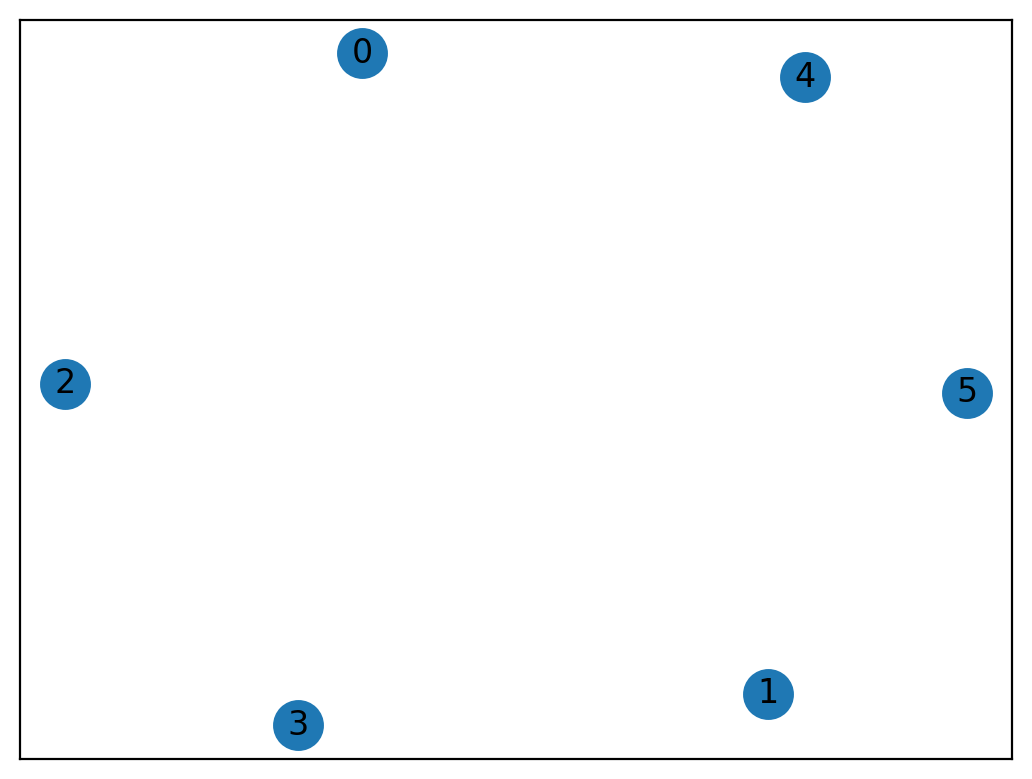

In [3]:
yes_mats, no_mats = matrix_triangle(2,1)
G = nx.from_numpy_array(yes_mats[0])
nx.draw_networkx(G)

In [6]:
set(range(5))

{0, 1, 2, 3, 4}

In [31]:
list(itertools.product(*([[1,2], [3,4]]*3)))

[(1, 3, 1, 3, 1, 3),
 (1, 3, 1, 3, 1, 4),
 (1, 3, 1, 3, 2, 3),
 (1, 3, 1, 3, 2, 4),
 (1, 3, 1, 4, 1, 3),
 (1, 3, 1, 4, 1, 4),
 (1, 3, 1, 4, 2, 3),
 (1, 3, 1, 4, 2, 4),
 (1, 3, 2, 3, 1, 3),
 (1, 3, 2, 3, 1, 4),
 (1, 3, 2, 3, 2, 3),
 (1, 3, 2, 3, 2, 4),
 (1, 3, 2, 4, 1, 3),
 (1, 3, 2, 4, 1, 4),
 (1, 3, 2, 4, 2, 3),
 (1, 3, 2, 4, 2, 4),
 (1, 4, 1, 3, 1, 3),
 (1, 4, 1, 3, 1, 4),
 (1, 4, 1, 3, 2, 3),
 (1, 4, 1, 3, 2, 4),
 (1, 4, 1, 4, 1, 3),
 (1, 4, 1, 4, 1, 4),
 (1, 4, 1, 4, 2, 3),
 (1, 4, 1, 4, 2, 4),
 (1, 4, 2, 3, 1, 3),
 (1, 4, 2, 3, 1, 4),
 (1, 4, 2, 3, 2, 3),
 (1, 4, 2, 3, 2, 4),
 (1, 4, 2, 4, 1, 3),
 (1, 4, 2, 4, 1, 4),
 (1, 4, 2, 4, 2, 3),
 (1, 4, 2, 4, 2, 4),
 (2, 3, 1, 3, 1, 3),
 (2, 3, 1, 3, 1, 4),
 (2, 3, 1, 3, 2, 3),
 (2, 3, 1, 3, 2, 4),
 (2, 3, 1, 4, 1, 3),
 (2, 3, 1, 4, 1, 4),
 (2, 3, 1, 4, 2, 3),
 (2, 3, 1, 4, 2, 4),
 (2, 3, 2, 3, 1, 3),
 (2, 3, 2, 3, 1, 4),
 (2, 3, 2, 3, 2, 3),
 (2, 3, 2, 3, 2, 4),
 (2, 3, 2, 4, 1, 3),
 (2, 3, 2, 4, 1, 4),
 (2, 3, 2, 4, 2, 3),
 (2, 3, 2, 4,